In [2]:
import pandas as pd
import os
os.getcwd()


'C:\\Users\\Richa 1\\Desktop\\Deskop\\python programming'

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")
len(movies)

559

In [4]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [4]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillion','Year']
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillion',
       'Year'],
      dtype='object')

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [7]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
###Year column should not be treated as a number

In [6]:
###Changing the type of the columns:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [12]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

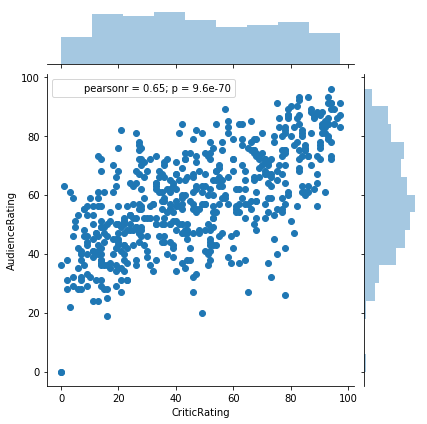

In [15]:
###jointplots
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating")
                  

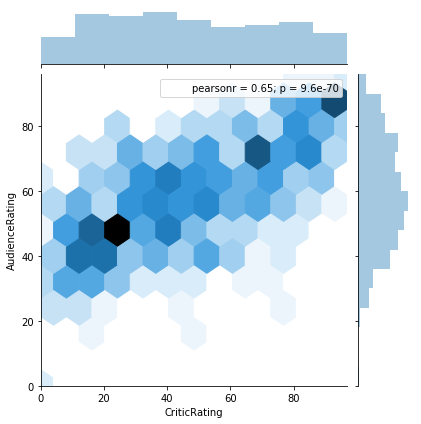

In [16]:
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind='hex')

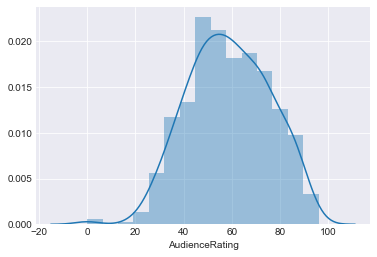

In [24]:
###Histograms:
sns.set_style("darkgrid")
m1 = sns.distplot(movies.AudienceRating, bins=15)
m1

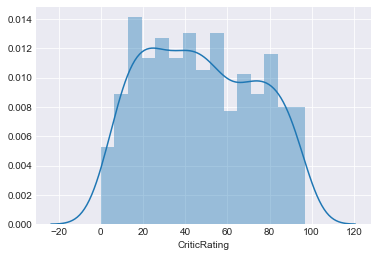

In [26]:
m2 = sns.distplot(movies.CriticRating, bins=15)
m2

(array([ 2.,  0.,  1.,  5., 20., 42., 48., 81., 76., 65., 67., 60., 45.,
        35., 12.]),
 array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. , 38.4, 44.8, 51.2, 57.6, 64. ,
        70.4, 76.8, 83.2, 89.6, 96. ]),
 <a list of 15 Patch objects>)

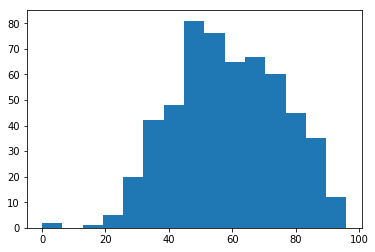

In [21]:
h1 = plt.hist(movies.AudienceRating, bins=15)
h1

(array([19., 32., 51., 41., 46., 41., 47., 38., 47., 28., 37., 32., 42.,
        29., 29.]),
 array([ 0.        ,  6.46666667, 12.93333333, 19.4       , 25.86666667,
        32.33333333, 38.8       , 45.26666667, 51.73333333, 58.2       ,
        64.66666667, 71.13333333, 77.6       , 84.06666667, 90.53333333,
        97.        ]),
 <a list of 15 Patch objects>)

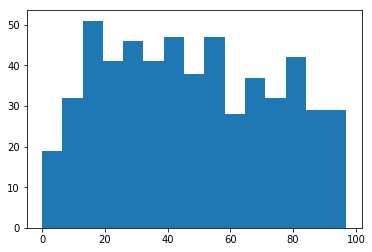

In [22]:
h1 = plt.hist(movies.CriticRating, bins=15)
h1

(array([29., 43., 24., 14., 13., 14., 11.,  3.,  2.,  1.]), array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]), <a list of 10 Patch objects>)
(array([25., 40., 18.,  8.,  6.,  2.,  1.,  0.,  0.,  1.]), array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]), <a list of 10 Patch objects>)


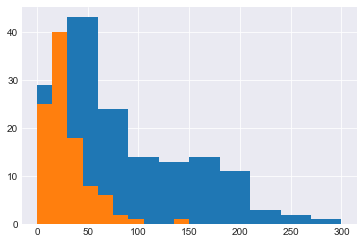

In [31]:
###stacked histograms:(They overlap and hide each other)
hist1=plt.hist(movies[movies.Genre == 'Action'].BudgetMillion)
print(hist1)
hist2=plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion)
print(hist2)

([array([29., 43., 24., 14., 13., 14., 11.,  3.,  2.,  1.]),
  array([5., 7., 7., 2., 3., 3., 1., 0., 1., 0.]),
  array([84., 54., 28.,  5.,  0.,  1.,  0.,  0.,  0.,  0.]),
  array([65., 26.,  8.,  1.,  0.,  1.,  0.,  0.,  0.,  0.]),
  array([33., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([8., 7., 2., 1., 0., 0., 0., 0., 0., 0.]),
  array([13.,  9.,  6.,  5.,  1.,  1.,  1.,  0.,  0.,  0.])],
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 7 Lists of Patches objects>)

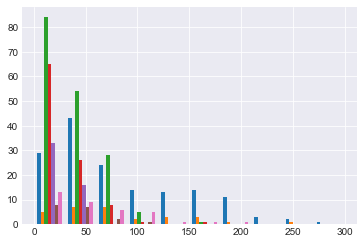

In [33]:
list = []
for gen in movies.Genre.cat.categories:
    list.append(movies[movies.Genre == gen].BudgetMillion)
hist=plt.hist(list)
hist

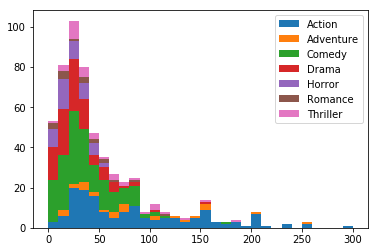

In [9]:
###Stacked histograms:
list = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)
hist=plt.hist(list,bins=30,stacked=True,label=mylabels)
hist
plt.legend()
plt.show()

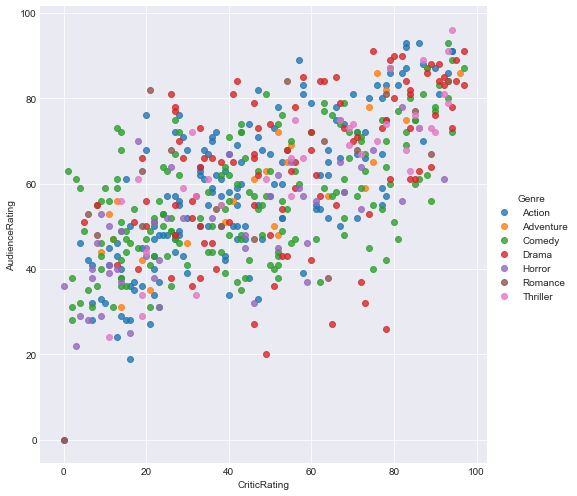

In [42]:
vis1 = sns.lmplot(data=movies, x="CriticRating",y="AudienceRating",fit_reg=False,size=7,aspect=1,hue="Genre")
plt.show()
vis1

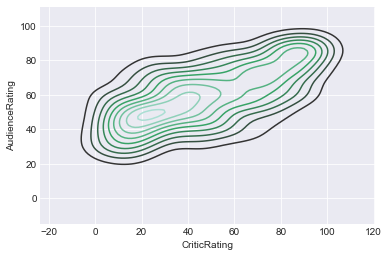

In [43]:
###KDE Plot
vis2 = sns.kdeplot(movies.CriticRating,movies.AudienceRating)
vis2

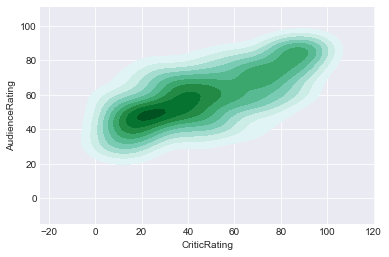

In [45]:
vis3 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest = False)
vis3

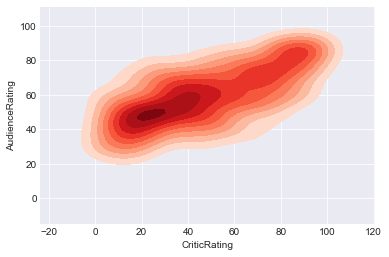

In [48]:
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest = False,cmap="Reds")
vis4

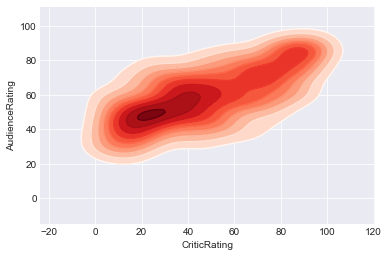

In [47]:
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest = False,cmap="Reds")
vis4
###tip for better edges:
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap="Reds")
vis4

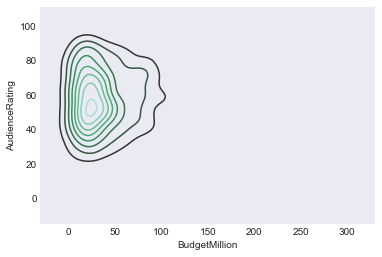

In [50]:
###Working with subplots:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating)
k1

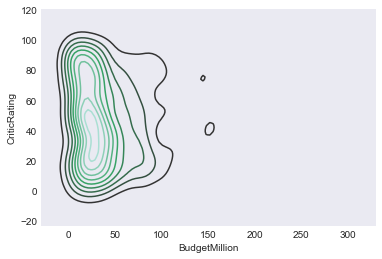

In [51]:
sns.set_style("dark")
k2 = sns.kdeplot(movies.BudgetMillion,movies.CriticRating)
k2

[(-20, 160)]

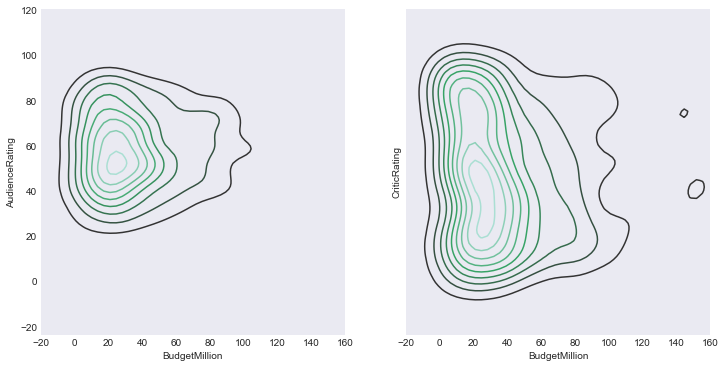

In [59]:
###Subplots:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillion,movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

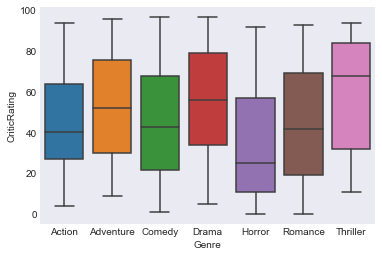

In [60]:
###Violinplots vs boxplots:
sns.boxplot(data=movies, x="Genre", y="CriticRating")

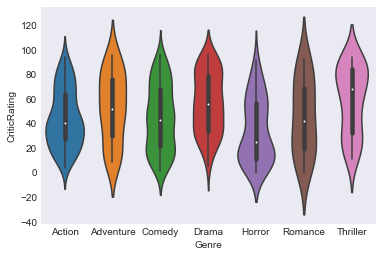

In [61]:
sns.violinplot(data=movies, x="Genre", y="CriticRating")

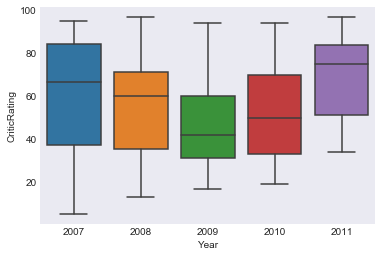

In [62]:
###Better visualisation using violin plots
sns.boxplot(data=movies[movies.Genre == "Drama"], x="Year", y="CriticRating")

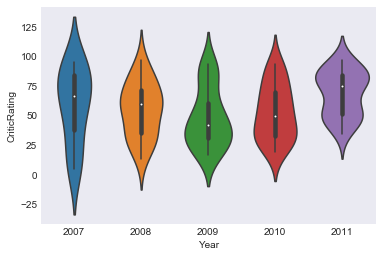

In [63]:
sns.violinplot(data=movies[movies.Genre == "Drama"], x="Year", y="CriticRating")

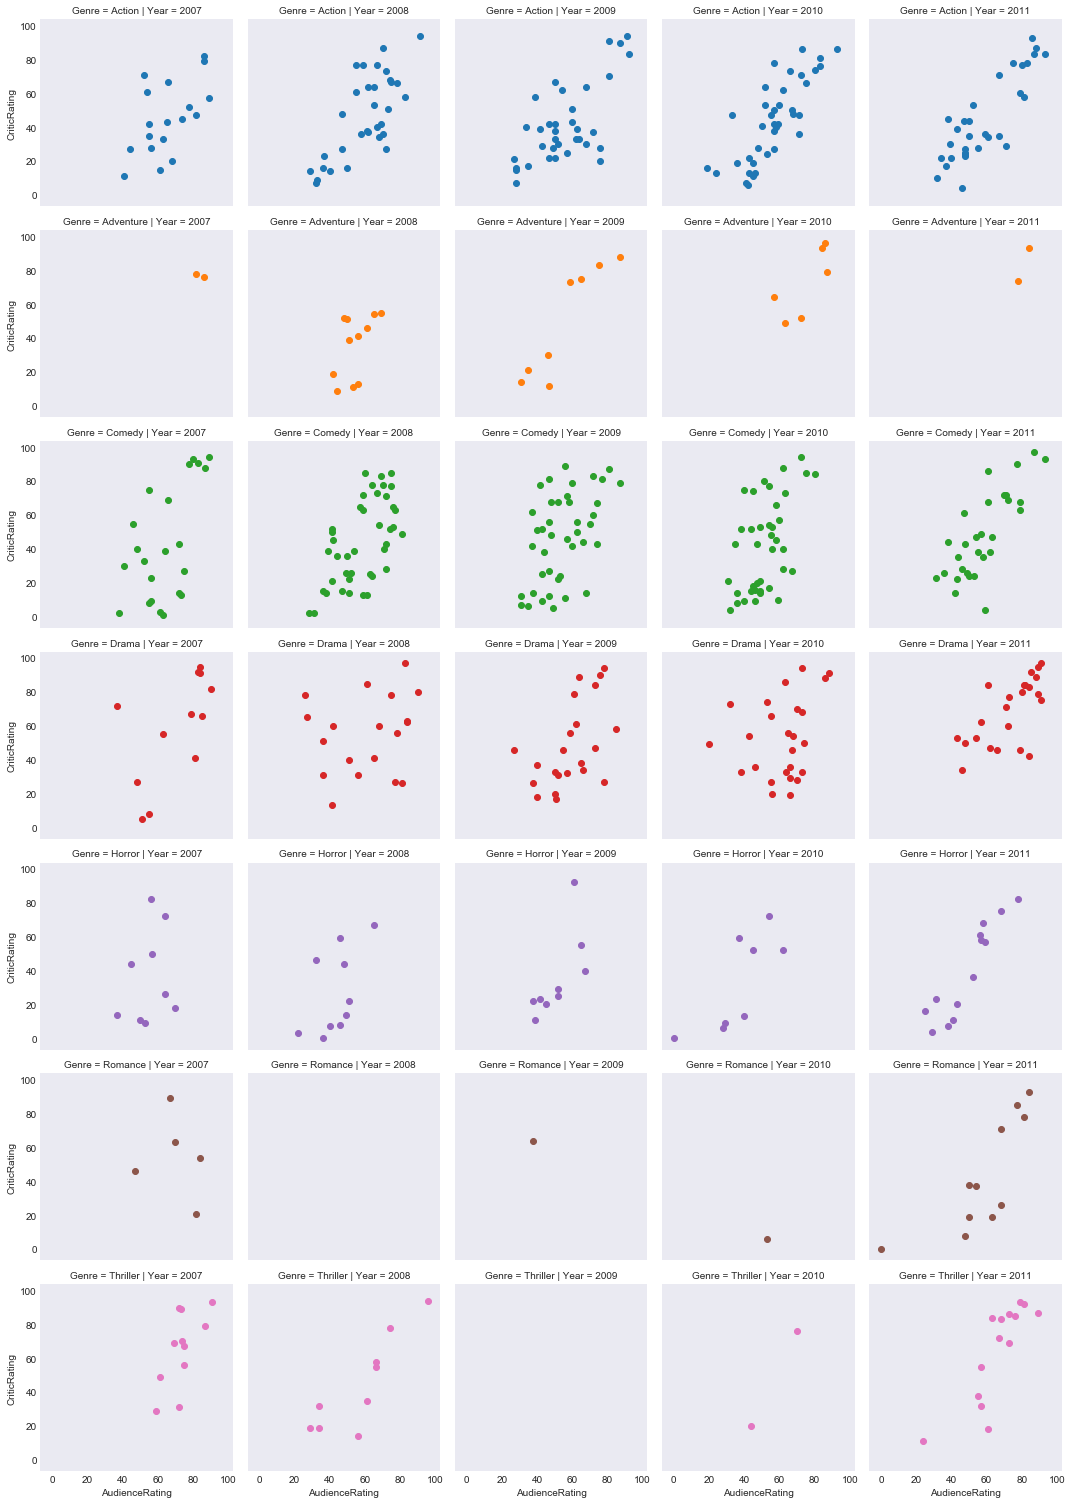

In [66]:
###creating a facet grid:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.scatter, "AudienceRating", "CriticRating")

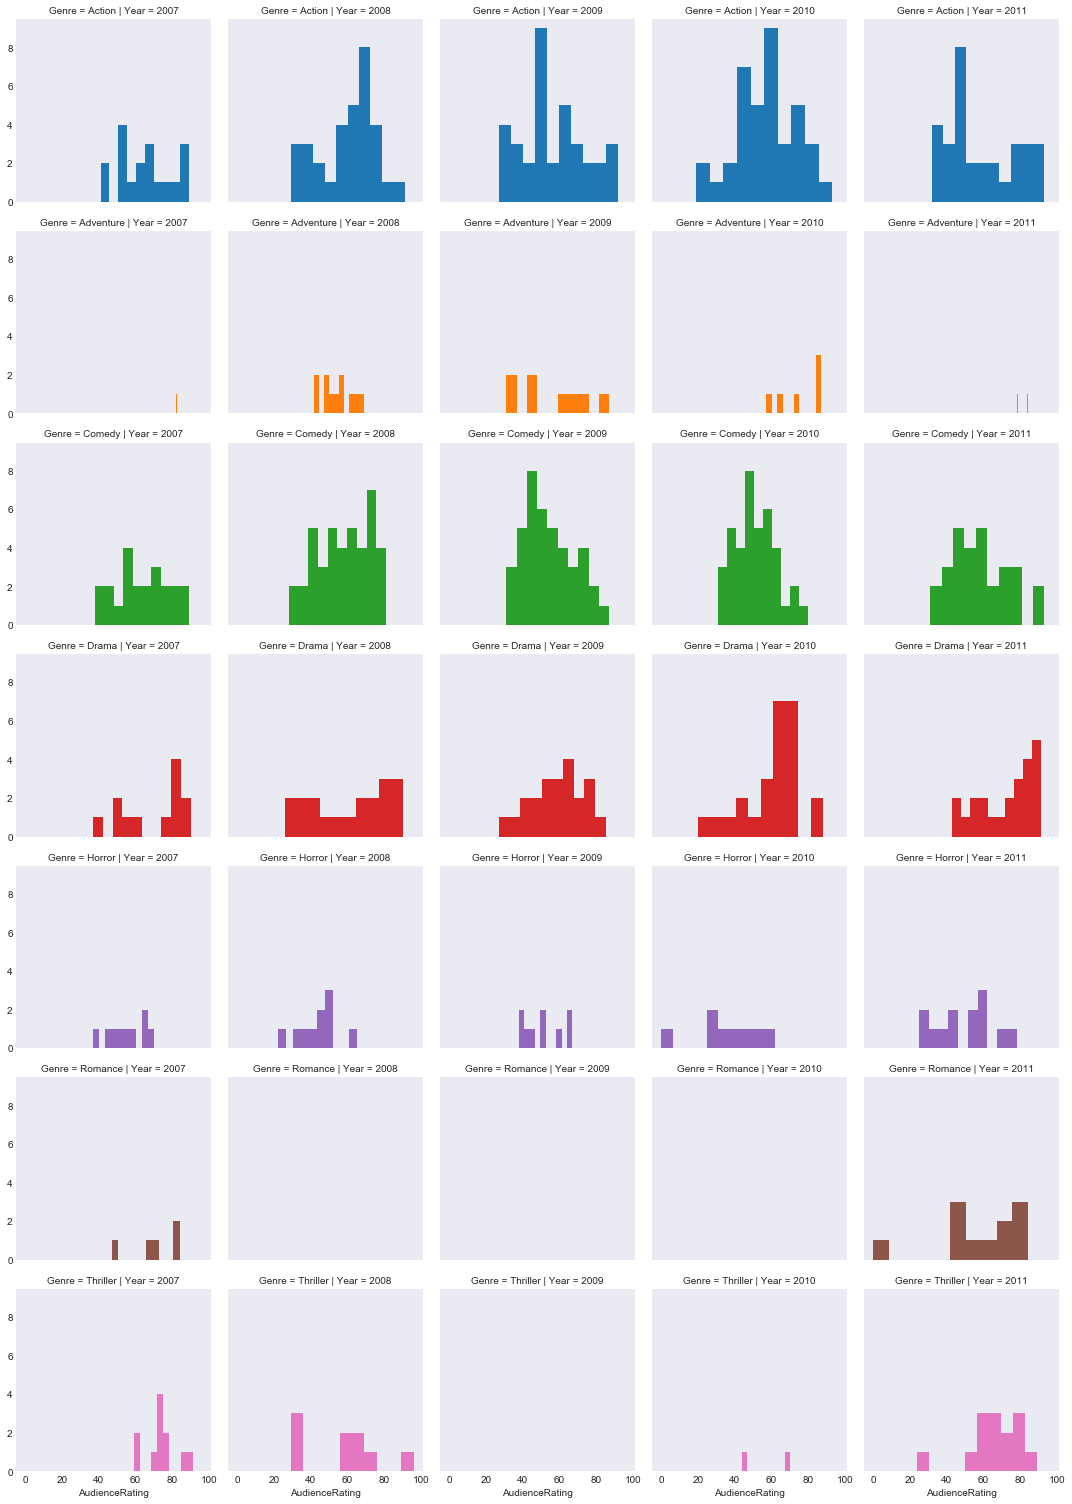

In [68]:
###populate with any type of chart:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
g = g.map(plt.hist,"AudienceRating")

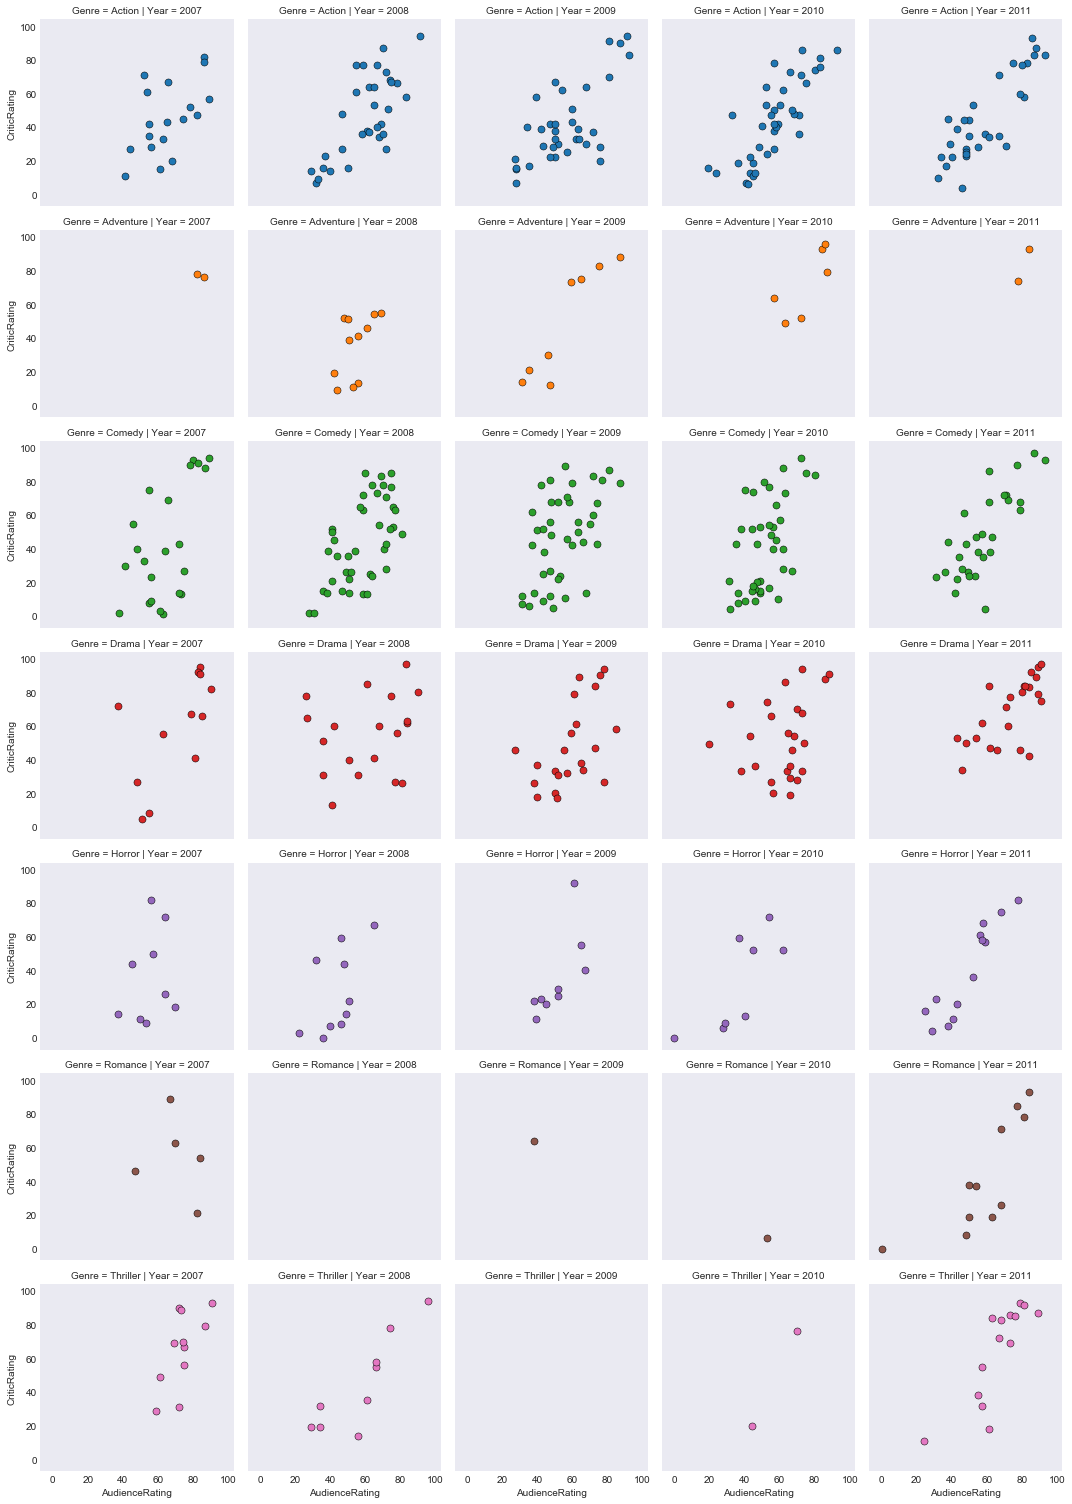

In [70]:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50,linewidth=0.5,edgecolor="black")
g = g.map(plt.scatter, "AudienceRating", "CriticRating",**kws)

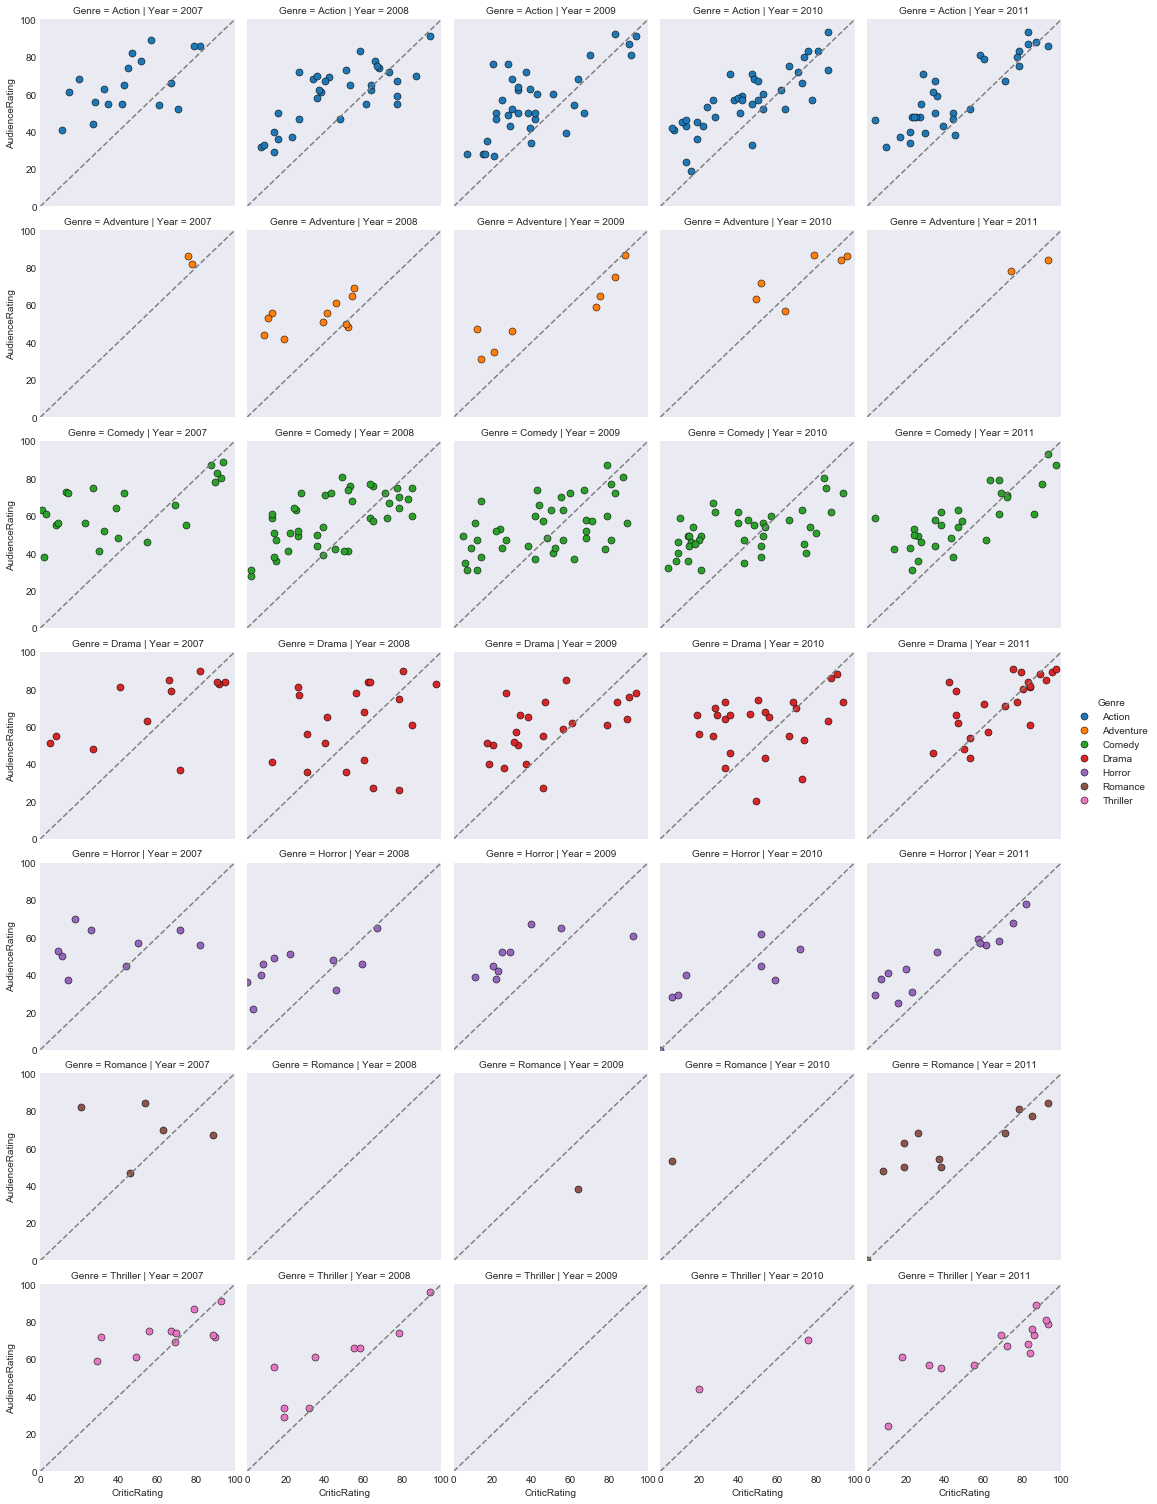

In [76]:
###adding diagonals:
g = sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre")
kws = dict(s=50,linewidth=0.5,edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating",**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c="gray",ls="--")
g.add_legend()

[(-20, 160)]

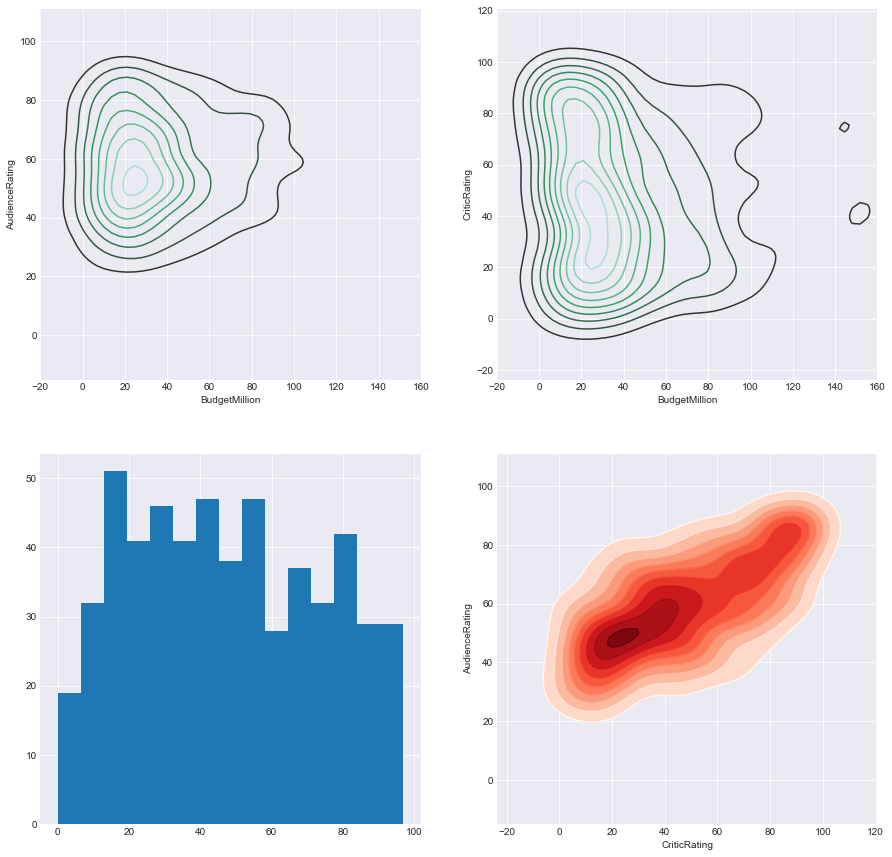

In [87]:
###creating a dashboard:
sns.set_style("darkgrid")
f,axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillion,movies.CriticRating, ax=axes[0,1])
###v = sns.violinplot(data=movies, x="Genre", y="CriticRating", ax=axes[1,0])
###for non snsplots:
axes[1,0].hist(movies.CriticRating, bins=15)
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest = False,cmap="Reds", ax=axes[1,1])
###tip for better edges:
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap="Reds", ax=axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

[(-20, 160)]

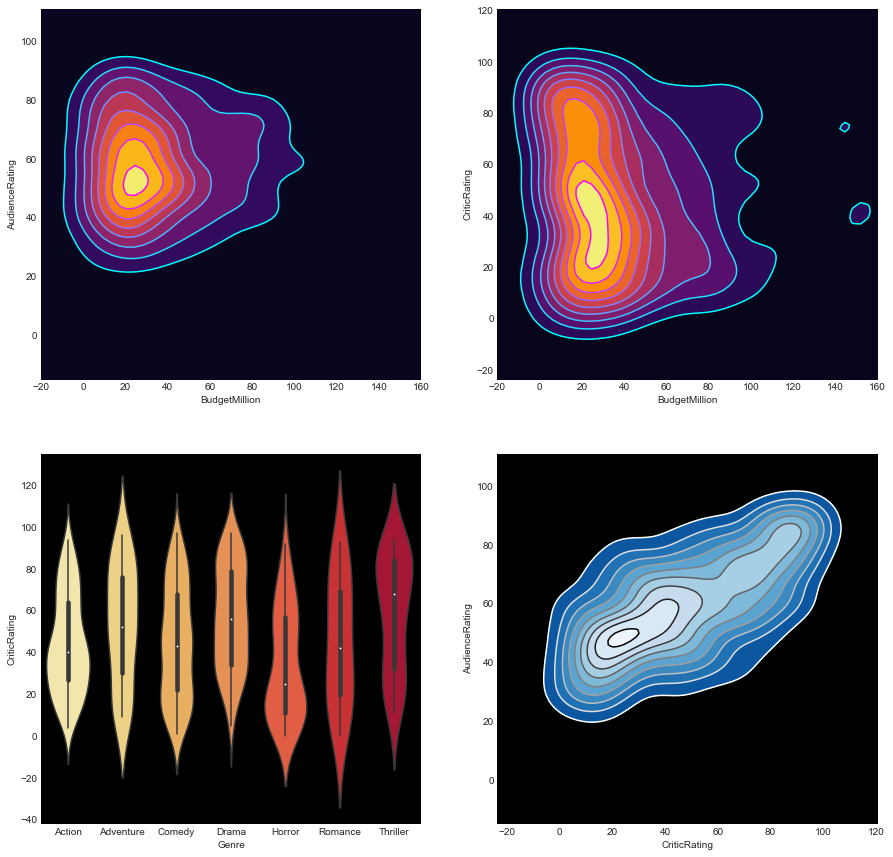

In [96]:
###Syling dashboards:
sns.set_style("dark",{"axes.facecolor":"black"})
f,axes = plt.subplots(2,2, figsize=(15,15))
###plot[0,0]
k1 = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating,shade=True, shade_lowest = True,cmap="inferno", ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillion,movies.AudienceRating,cmap="cool", ax=axes[0,0])
###plot[0,1]
k2 = sns.kdeplot(movies.BudgetMillion,movies.CriticRating,shade=True, shade_lowest = True,cmap="inferno", ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillion,movies.CriticRating,cmap="cool", ax=axes[0,1])
###plot[1,0]
v = sns.violinplot(data=movies, x="Genre", y="CriticRating", ax=axes[1,0], palette ="YlOrRd")
###plot[1,1]
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating, shade=True, shade_lowest = False,cmap="Blues_r", ax=axes[1,1])
###tip for better edges:
vis4 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap="gist_gray_r", ax=axes[1,1])
k1.set(xlim=(-20,160))
k1b.set(xlim=(-20,160))
k1.set(xlim=(-20,160))
k2b.set(xlim=(-20,160))

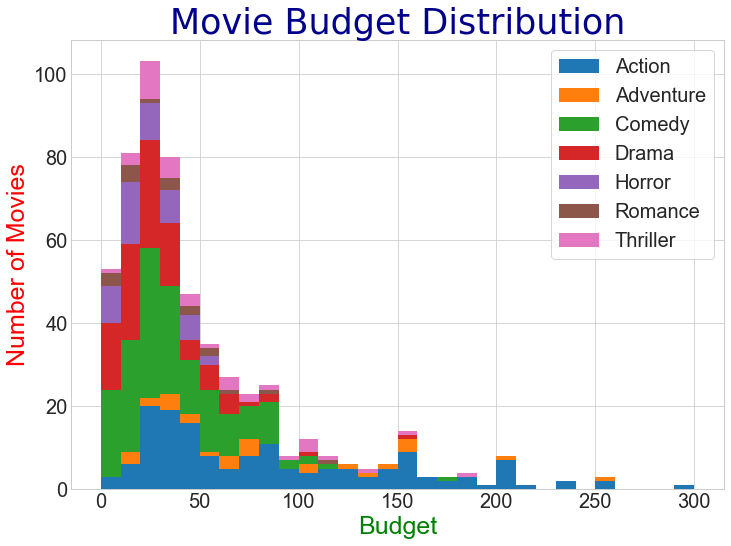

In [104]:
list = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list.append(movies[movies.Genre == gen].BudgetMillion)
    mylabels.append(gen)
sns.set_style("whitegrid")
f, ax = plt.subplots()
f.set_size_inches(11.7,8.27)#size of A4 paper
hist=plt.hist(list,bins=30,stacked=True,label=mylabels)
hist
plt.title("Movie Budget Distribution", fontsize=35, color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies",fontsize=25,color="Red")
plt.xlabel("Budget",fontsize=25,color="Green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True,framealpha=1, prop={"size":20})